#Task 1: Predictive Modeling (Classification)

##Objectives:
- Preprocess the data (handle categorical variables,
feature scaling).
- Train and test multiple classification models (e.g.,
- Decision Trees, Logistic Regression, Random Forest).
- Evaluate models using accuracy, precision, recall, and
F1-score.
- Perform hyperparameter tuning using grid search.


#Step 1 – Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


#Interpretation:
We load pandas and numpy for data handling, matplotlib/seaborn for plots, scikit-learn for preprocessing, models, and metrics.

#Step 2 – Load and Inspect the Data

In [2]:

from google.colab import files
uploaded = files.upload()
df = pd.read_csv('churn-bigml-80.csv')

print(df.shape)
df.head()


Saving churn-bigml-80.csv to churn-bigml-80.csv
(2666, 20)


,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


#Interpretation:
We load the telecom churn dataset, check its shape (rows, columns), and preview the first few entries to understand its structure.

#Step 3 – Data Preprocessing

In [3]:
# Step 3a: Handle categorical variables
df['International plan'] = df['International plan'].map({'Yes': 1, 'No': 0})
df['Voice mail plan'] = df['Voice mail plan'].map({'Yes': 1, 'No': 0})

# Encode churn target variable (Yes/No → 1/0)
df['Churn'] = df['Churn'].map({True: 1, False: 0, 'Yes': 1, 'No': 0})

# Drop high-cardinality features not useful for prediction
df = df.drop(columns=['State', 'Area code'], errors='ignore')

# Step 3b: Split features (X) and target (y)
X = df.drop(columns=['Churn'])
y = df['Churn']

# Step 3c: Feature scaling (only for numerical features)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


#Interpretation:

- We convert International plan and Voice mail plan into binary values.

- Encode Churn as 1 (customer churned) and 0 (customer retained).

- Remove State and Area code because they are categorical with too many levels and add little predictive power.

- Scale numerical features so models like Logistic Regression aren’t biased by large-value columns.

#Step 4 – Train/Test Split

In [4]:
# Step 4: Split data into training (70%) and testing (30%)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42, stratify=y
)


#Interpretation:
- We split data into training and testing sets.

- The stratify=y ensures the class balance (churn vs non-churn) is preserved in both sets.

# Step 5 – Train Baseline Models

In [5]:
# Step 5a: Logistic Regression
log_reg = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)
log_reg.fit(X_train, y_train)

# Step 5b: Decision Tree
dt = DecisionTreeClassifier(random_state=42, class_weight='balanced')
dt.fit(X_train, y_train)

# Step 5c: Random Forest
rf = RandomForestClassifier(random_state=42, class_weight='balanced')
rf.fit(X_train, y_train)


RandomForestClassifier(class_weight='balanced', random_state=42)

#Interpretation:

- Logistic Regression: interpretable baseline, handles imbalanced classes with class_weight='balanced'.

- Decision Tree: captures non-linear relationships.

- Random Forest: ensemble method, generally higher performance.

#Step 6 – Evaluate Models

In [6]:
models = {'Logistic Regression': log_reg, 'Decision Tree': dt, 'Random Forest': rf}

for name, model in models.items():
    y_pred = model.predict(X_test)
    print(f"=== {name} ===")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall:", recall_score(y_test, y_pred))
    print("F1-score:", f1_score(y_test, y_pred))
    print("\n")


=== Logistic Regression ===
Accuracy: 0.75
Precision: 0.332
Recall: 0.7155172413793104
F1-score: 0.453551912568306


=== Decision Tree ===
Accuracy: 0.91
Precision: 0.7115384615384616
Recall: 0.6379310344827587
F1-score: 0.6727272727272727


=== Random Forest ===
Accuracy: 0.93875
Precision: 0.935064935064935
Recall: 0.6206896551724138
F1-score: 0.7461139896373057




#Interpretation:
- We compare models using accuracy, precision, recall, and F1-score.

- Precision = correctness of positive predictions (important to avoid false alarms).

- Recall = ability to catch churners (critical in churn prediction).

- F1 = balance between precision & recall.

# Step 7 – Confusion Matrix Visualization

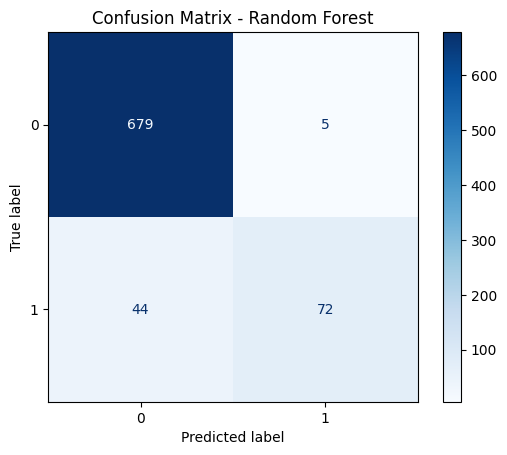

In [7]:
from sklearn.metrics import ConfusionMatrixDisplay

y_pred_rf = rf.predict(X_test)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_rf, cmap="Blues")
plt.title("Confusion Matrix - Random Forest")
plt.show()


#Interpretation:
Confusion matrix shows how many churners were correctly/incorrectly classified. This helps evaluate false negatives (missed churners).

# Step 8 – Hyperparameter Tuning (Random Forest example)

In [8]:
# Step 8: Grid search on Random Forest
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}

grid_search = GridSearchCV(
    RandomForestClassifier(random_state=42, class_weight='balanced'),
    param_grid,
    cv=3,
    scoring='f1',
    n_jobs=-1
)

grid_search.fit(X_train, y_train)
print("Best Parameters:", grid_search.best_params_)
print("Best F1 Score (CV):", grid_search.best_score_)


Best Parameters: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 200}
Best F1 Score (CV): 0.7434368191721132


#Professional Interpretation:
- We tune Random Forest hyperparameters (n_estimators, max_depth, min_samples_split) using GridSearchCV.
- The scoring metric is F1-score, because churn datasets are imbalanced.